In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from dash import Dash, dcc, html

df = pd.read_csv("onlinedeliverydata.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,Important,Important,Important,Important,Important,Important,Important,Important,Yes,Nil
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,Moderately Important,Very Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Very Important,Very Important,Yes,Nil
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,Important,Very Important,Important,Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,Important,Very Important,Important,Very Important,Very Important,Important,Very Important,Very Important,Yes,Language barrier is also one major issue. Mosl...


In [24]:
#1. Data Exploration
summary_stats = df.describe().T
fig1 = px.imshow(summary_stats,
                labels=dict(x="Statistics", y="Features", color="Value"),
                title="Summary Statistics Heatmap",
                text_auto=".2f",
                color_continuous_scale="Blues")
fig1.show()

fig1.write_html("summary_stats_heatmap.html")
print("HTML file saved as 'summary_stats_heatmap.html'")

missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'MissingCount']
missing_values = missing_values[missing_values['MissingCount'] > 0]
fig2 = px.bar(missing_values,
              x='Column',
              y='MissingCount',
              title='Missing Values per Column',
              color='MissingCount',
              color_continuous_scale='Reds')
fig2.show()

fig2.write_html("missing_values_plot.html")
print("HTML file saved as 'missing_values_plot.html'")

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    fig = px.histogram(df, x=col, title=f'Distribution of {col}',
                      marginal='box')
    fig.show()

    fig.write_html(f"{col}_distribution_plot.html")
    print(f"HTML file saved as '{col}_distribution_plot.html'")

HTML file saved as 'summary_stats_heatmap.html'


HTML file saved as 'missing_values_plot.html'
Number of duplicate rows: 102


HTML file saved as 'Age_distribution_plot.html'


HTML file saved as 'Family size_distribution_plot.html'


HTML file saved as 'latitude_distribution_plot.html'


HTML file saved as 'longitude_distribution_plot.html'


HTML file saved as 'Pin code_distribution_plot.html'


HTML file saved as 'Ease and convenient_distribution_plot.html'


HTML file saved as 'Time saving_distribution_plot.html'


HTML file saved as 'More restaurant choices_distribution_plot.html'


HTML file saved as 'Easy Payment option_distribution_plot.html'


HTML file saved as 'More Offers and Discount_distribution_plot.html'


HTML file saved as 'Good Food quality_distribution_plot.html'


HTML file saved as 'Good Tracking system_distribution_plot.html'


HTML file saved as 'Monthly Income Numeric_distribution_plot.html'


In [25]:
#2. Customer Age Distribution
df = df[df['Age'].notnull()]
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

fig = px.histogram(df,
                  x='Age',
                  nbins=20,
                  title='Customer Age Distribution',
                  labels={'Age': 'Customer Age'},
                  color_discrete_sequence=['#f0605d'],
                  marginal='box',
                  hover_data=df.columns)
fig.update_layout(bargap=0.1)
fig.show()

fig.write_html("age_distribution_plot.html")
print("HTML file saved as 'age_distribution_plot.html'")

# Age groups
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_counts = df['Age Group'].value_counts().sort_index()
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['Age Group', 'Count']

fig = px.bar(age_group_df,
            x='Age Group',
            y='Count',
            title='Most Active Age Groups Ordering Food Online',
            color='Count',
            color_continuous_scale='Turbo',
            text='Count')
fig.update_layout(xaxis_title='Age Group', yaxis_title='Number of Customers')
fig.show()

fig.write_html("age_group_plot.html")
print("HTML file saved as 'age_group_plot.html'")

HTML file saved as 'age_distribution_plot.html'


HTML file saved as 'age_group_plot.html'


In [26]:
#3. Gender-Based Ordering Preferences
df = df[df['Gender'].notnull()]
df['Gender'] = df['Gender'].str.strip().str.capitalize()

gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Order Count']

fig = px.bar(gender_counts,
            x='Gender',
            y='Order Count',
            color='Gender',
            text='Order Count',
            title='Online Food Orders by Gender',
            color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(xaxis_title='Gender', yaxis_title='Number of Orders')
fig.show()

fig.write_html("gender_order_plot.html")
print("HTML file saved as 'gender_order_plot.html'")

HTML file saved as 'gender_order_plot.html'


In [27]:
#4. Monthly Income Distribution
fig = px.box(df, y="Monthly Income", title="Income Distribution", points="all")
fig.update_traces(
    marker=dict(color="#6A0DAD"),
    line=dict(color="#FF7F50")
)
fig.show()

fig.write_html("income_distribution_plot.html")
print("HTML file saved as 'income_distribution_plot.html'")

HTML file saved as 'income_distribution_plot.html'


In [28]:
#5. Impact of Discounts on Orders
df['More Offers and Discount'] = df['More Offers and Discount'].astype(str).str.strip().str.capitalize()
discount_counts = df['More Offers and Discount'].value_counts().reset_index()
discount_counts.columns = ['Preference', 'Count']

fig = px.pie(discount_counts,
            names='Preference',
            values='Count',
            title='Customer Preference for Discounts',
            color_discrete_sequence=px.colors.qualitative.Pastel,
            hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.show()

fig.write_html("discount_preference_plot.html")
print("HTML file saved as 'discount_preference_plot.html'")

HTML file saved as 'discount_preference_plot.html'


In [29]:
#6. Education Level & Customer Satisfaction
df['Educational Qualifications'] = df['Educational Qualifications'].astype(str).str.strip()
df['Output'] = df['Output'].astype(str).str.strip().str.capitalize()

fig = px.violin(df,
               x='Educational Qualifications',
               y='Output',
               box=True,
               points='all',
               title='Customer Satisfaction by Education Level',
               color='Educational Qualifications',
               template = "plotly_dark")
fig.update_layout(xaxis_title='Education Level',
                 yaxis_title='Satisfaction (Yes/No)',
                 showlegend=False)
fig.show()

fig.write_html("education_satisfaction_plot.html")
print("HTML file saved as 'education_satisfaction_plot.html'")

HTML file saved as 'education_satisfaction_plot.html'


In [30]:
#7. Impact of Delivery Time on Customer Satisfaction
df_cleaned = df.dropna(subset=['Maximum wait time', 'Output'])

fig = px.box(
    df_cleaned,
    x='Output',
    y='Maximum wait time',
    color='Output',
    template = "plotly_white",
    title='Impact of Delivery Time on Customer Satisfaction',
    labels={'Output': 'Customer Satisfaction', 'Maximum wait time': 'Wait Time (minutes)'}
)
fig.show()

fig.write_html("delivery_time_satisfaction_plot.html")
print("HTML file saved as 'delivery_time_satisfaction_plot.html'")

HTML file saved as 'delivery_time_satisfaction_plot.html'


In [12]:
#8. Impact of Hygiene on Customer Satisfaction
df['Poor Hygiene'] = df['Poor Hygiene'].astype(str).str.strip().str.capitalize()
df['Output'] = df['Output'].astype(str).str.strip().str.capitalize()

hygiene_impact = df.groupby(['Poor Hygiene', 'Output']).size().reset_index(name='Count')

fig = px.bar(hygiene_impact,
            x='Poor Hygiene',
            y='Count',
            color='Output',
            barmode='group',
            title='Impact of Poor Hygiene on Customer Satisfaction',
            labels={'Poor Hygiene': 'Reported Poor Hygiene', 'Output': 'Satisfaction'})
fig.show()

fig.write_html("hygiene_impact_plot.html")
print("HTML file saved as 'hygiene_impact_plot.html'")

In [31]:
#9. Google Maps Accuracy & Delivery Quality
df_map = df.dropna(subset=['Google Maps Accuracy', 'Output'])

fig = px.box(
    df_map,
    x='Output',
    y='Google Maps Accuracy',
    color='Output',
    title='Google Maps Accuracy vs Customer Satisfaction',
    labels={'Output': 'Customer Satisfaction', 'Google Maps Accuracy': 'Google Maps Accuracy Level'},
    boxmode='group'
)
fig.show()

fig.write_html("google_maps_accuracy_plot.html")
print("HTML file saved as 'google_maps_accuracy_plot.html'")

HTML file saved as 'google_maps_accuracy_plot.html'


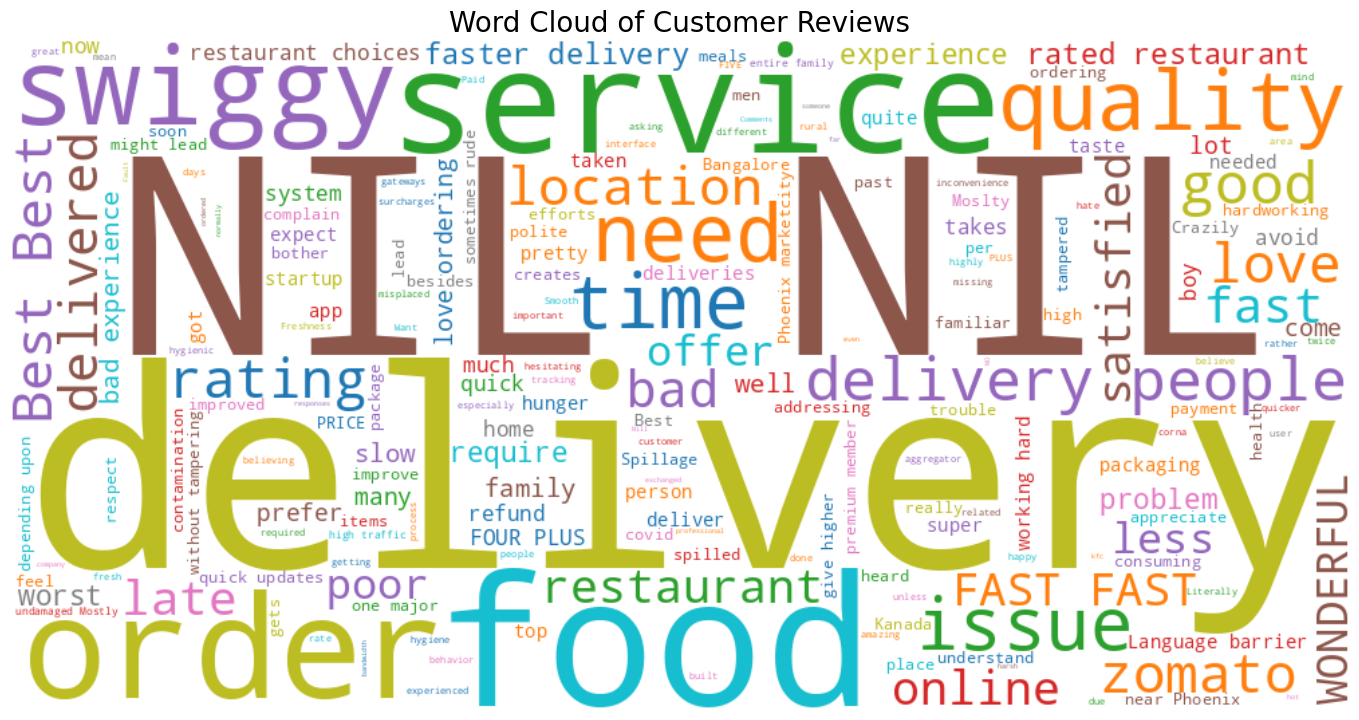

Image saved as 'wordcloud_reviews.png'


<Figure size 640x480 with 0 Axes>

In [33]:
#10. Word Cloud for Customer Reviews
from wordcloud import WordCloud
df = df.dropna(subset=['Reviews'])
all_reviews = ' '.join(df['Reviews'].astype(str).tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      colormap='tab10').generate(all_reviews)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Reviews', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud_reviews.png', bbox_inches='tight')
print("Image saved as 'wordcloud_reviews.png'")

In [34]:
#11. Family Size & Ordering Habits
family_order_counts = df['Family size'].value_counts().reset_index()
family_order_counts.columns = ['Family size', 'Order Count']

fig = px.box(df, y='Family size', title='Family Size Distribution',
            labels={'Family size': 'Family Size'},
            template='plotly_white')

bar_fig = px.bar(family_order_counts.sort_values(by='Family size'),
                x='Family size', y='Order Count',
                title='Order Frequency by Family Size',
                labels={'Order Count': 'Number of Orders'},
                template='plotly_white')
bar_fig.show()

bar_fig.write_html("family_order_plot.html")
print("HTML file saved as 'family_order_plot.html'")

HTML file saved as 'family_order_plot.html'


In [35]:
#12. Effect of Delivery Time on Customer Satisfaction
wait_order = ['15 minutes', '30 minutes', '45 minutes', '60 minutes', 'More than 60 minutes']
df['Maximum wait time'] = pd.Categorical(df['Maximum wait time'], categories=wait_order, ordered=True)

fig = px.box(
    df,
    x='Output',
    y='Maximum wait time',
    color='Output',
    title="Impact of Delivery Time on Customer Satisfaction",
    labels={'Maximum wait time': 'Wait Time (minutes)', 'Satisfaction': 'Customer Satisfaction'},
    color_discrete_map={'Yes': 'royalblue', 'No': 'tomato'}
)
fig.show()

fig.write_html("delivery_time_satisfaction_plot.html")
print("HTML file saved as 'delivery_time_satisfaction_plot.html'")

HTML file saved as 'delivery_time_satisfaction_plot.html'


In [37]:
#13. Preferred Order Medium
medium_prefs = pd.concat([df['Medium (P1)'], df['Medium (P2)']], ignore_index=True)
platform_counts = medium_prefs.value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']

fig = px.bar(
    platform_counts,
    x='Platform',
    y='Count',
    title='Customer Preference for Food Ordering Platforms (P1 & P2)',
    labels={'Count': 'Number of Preferences'},
    color='Platform',
    text='Count'
)
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

fig.write_html("platform_preference_plot.html")
print("HTML file saved as 'platform_preference_plot.html'")

HTML file saved as 'platform_preference_plot.html'


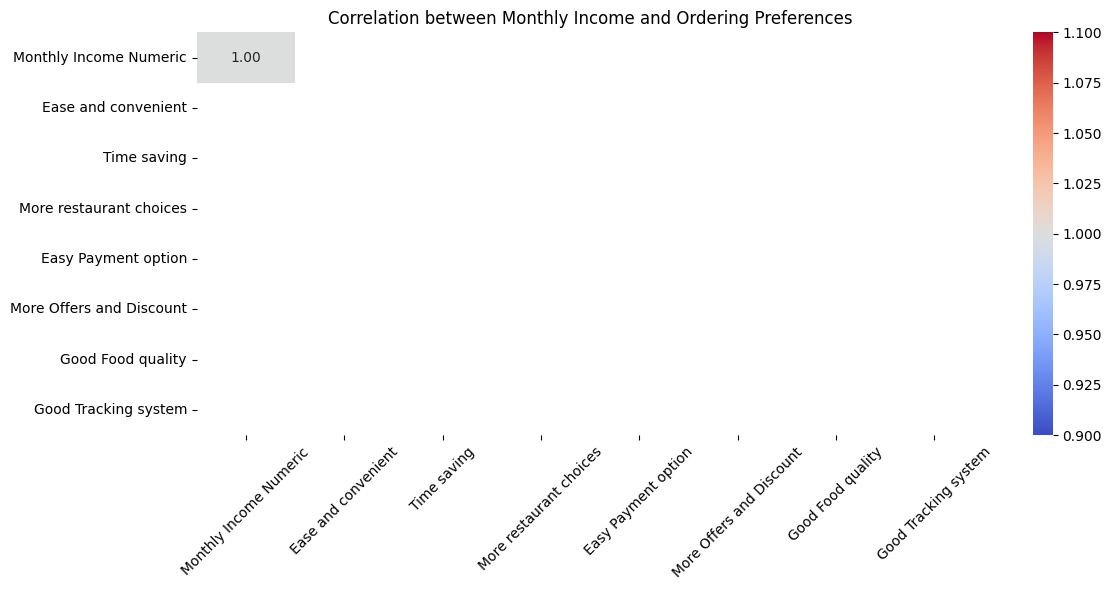

Image saved as 'correlation_plot.png'


<Figure size 640x480 with 0 Axes>

In [38]:
#14. Correlation Analysis of Monthly Income & Ordering Habits
income_mapping = {
    "No Income": 0,
    "Below Rs.10000": 1,
    "10001 to 25000": 2,
    "25001 to 50000": 3,
    "More than 50000": 4
}

df["Monthly Income Numeric"] = df["Monthly Income"].map(income_mapping)

preference_columns = [
    "Ease and convenient", "Time saving", "More restaurant choices",
    "Easy Payment option", "More Offers and Discount", "Good Food quality",
    "Good Tracking system"
]

response_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}

for col in preference_columns:
    df[col] = df[col].map(response_mapping)

correlation_df = df[["Monthly Income Numeric"] + preference_columns]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Monthly Income and Ordering Preferences")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('correlation_plot.png', bbox_inches='tight')
print("Image saved as 'correlation_plot.png'")

In [39]:
#15. Geographic Distribution of Orders
df_geo = df.dropna(subset=['latitude', 'longitude', 'Pin code'])
location_summary = df_geo.groupby(['Pin code', 'latitude', 'longitude']).size().reset_index(name='Order Count')

fig = px.scatter_mapbox(
    location_summary,
    lat='latitude',
    lon='longitude',
    size='Order Count',
    hover_name='Pin code',
    zoom=3,
    height=600,
    color='Order Count',
    color_continuous_scale='Blues',
    title='Geographic Clustering of Orders by Pin Code'
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin={"r":0,"t":40,"l":0,"b":0}
)
fig.show()

fig.write_html("geographic_distribution_plot.html")
print("HTML file saved as 'geographic_distribution_plot.html'")

HTML file saved as 'geographic_distribution_plot.html'


In [40]:
#16. Impact of Late Delivery on Satisfaction
df.columns = df.columns.str.strip()

fig = px.violin(
    df,
    x='Late Delivery',
    y='Output',
    color='Late Delivery',
    box=True,
    points='all',
    title="Impact of Late Delivery on Customer Satisfaction",
    labels={'Output': 'Customer Satisfaction', 'Late Delivery': 'Late Delivery Reported'}
)
fig.show()

fig.write_html("late_delivery_satisfaction_plot.html")
print("HTML file saved as 'late_delivery_satisfaction_plot.html'")

HTML file saved as 'late_delivery_satisfaction_plot.html'


In [41]:
#17. Impact of Politeness on Satisfaction
df_clean = df.dropna(subset=["Politeness", "Output"])

fig = px.histogram(
    df_clean,
    x="Politeness",
    color="Output",
    barmode="group",
    title="Impact of Politeness on Customer Satisfaction",
    labels={"Politeness": "Politeness of Delivery Personnel", "Output": "Customer Satisfaction"},
    color_discrete_map={"Yes": "royalblue", "No": "tomato"}
)
fig.update_layout(xaxis_title="Politeness Level", yaxis_title="Number of Customers")
fig.show()

fig.write_html("politeness_satisfaction_plot.html")
print("HTML file saved as 'politeness_satisfaction_plot.html'")

HTML file saved as 'politeness_satisfaction_plot.html'


In [42]:
#18. Order Time Preferences
fig = px.bar(df, x="Order Time", title="Order Time Preferences", color="Order Time")
fig.show()

fig.write_html("order_time_preferences_plot.html")
print("HTML file saved as 'order_time_preferences_plot.html'")

HTML file saved as 'order_time_preferences_plot.html'


In [45]:
#19. Interactive Dashboard for Key Insights
#Pie Chart for Customer Satisfaction Distribution
fig_d1 = px.pie(df, names='Output', title='Customer Satisfaction Distribution',
                color_discrete_sequence=px.colors.sequential.RdBu)

# Bar Chart for Gender-Based Order Distribution
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Order Count']  # Rename columns for clarity
fig_d2 = px.bar(gender_counts,
                x='Gender',
                y='Order Count',
                title='Gender-Based Order Distribution',
                labels={'Gender': 'Gender', 'Order Count': 'Count'})

# Correlation Heatmap for Income & Preferences
corr_df = df.copy()
# Convert 'Monthly Income' to numeric (category codes)
corr_df['Monthly Income'] = corr_df['Monthly Income'].astype('category').cat.codes
# Convert all Yes/No columns to binary (1/0) for correlation
binary_cols = [col for col in corr_df.columns if corr_df[col].dropna().isin(['Yes', 'No']).all()]
corr_df[binary_cols] = corr_df[binary_cols].replace({'Yes': 1, 'No': 0})
heat_data = corr_df.corr(numeric_only=True)
# Create heatmap
fig_d3 = px.imshow(heat_data,
                text_auto=True,
                title="Correlation Heatmap: Income & Preferences",
                color_continuous_scale='Blues')

# Geographic Map for Customer Order Locations
fig_d4 = px.scatter_mapbox(df, lat='latitude', lon='longitude',
                         zoom=3, mapbox_style='open-street-map',
                         title='Customer Order Locations')

# Order Time Preferences for Peak Order Times
fig_d5 = px.histogram(df, x='Order Time', title='Peak Order Times',
                     color_discrete_sequence=['orange'])

app = Dash(__name__)
app.layout = html.Div(children=[
    html.H1("Online Food Delivery Analysis"),
    dcc.Graph(figure=fig_d1),  # Pie Chart: Customer satisfaction distribution
    dcc.Graph(figure=fig_d2),  # Bar Chart: Gender-based order distribution
    dcc.Graph(figure=fig_d3),  # Heatmap: Income correlation with ordering behavior
    dcc.Graph(figure=fig_d4),  # Geographic Map: Customer order locations
    dcc.Graph(figure=fig_d5),  # Order Time Preferences
])

if __name__ == "__main__":
    app.run(debug=True)

# Save individual charts as HTML files
fig_d1.write_html("customer_satisfaction_pie.html")
fig_d2.write_html("gender_distribution_bar.html")
fig_d3.write_html("correlation_heatmap.html")
fig_d4.write_html("customer_locations_map.html")
fig_d5.write_html("peak_order_times.html")

/tmp/ipython-input-45-1189043575.py:21: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<IPython.core.display.Javascript object>